Libraries imported successfully!

--- Dataset Information ---
First 5 rows of the dataset:
  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes

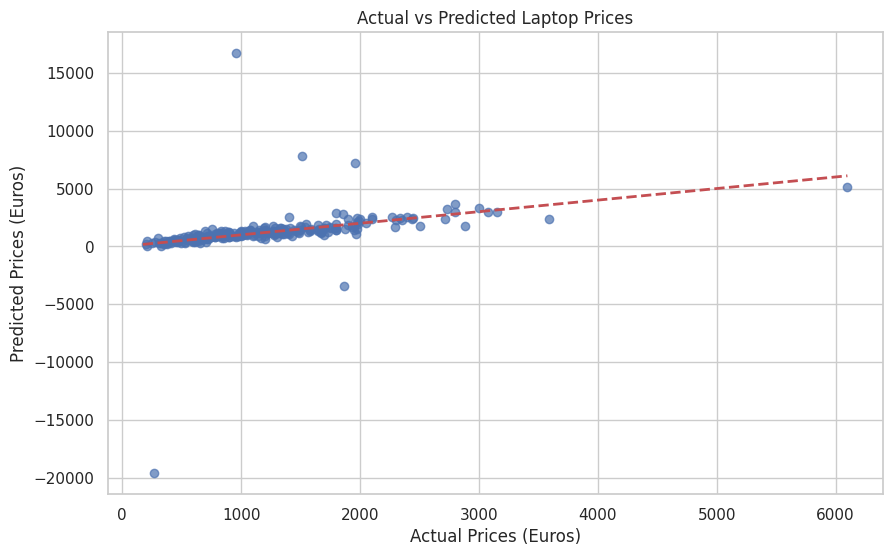

Observation: The distribution of laptop prices is right-skewed, indicating more affordable laptops and fewer very expensive ones.


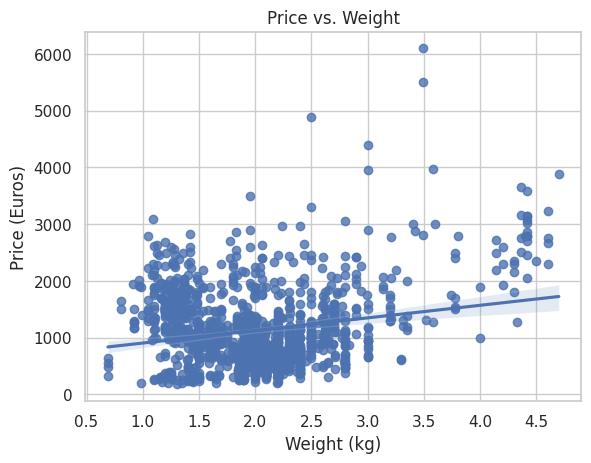

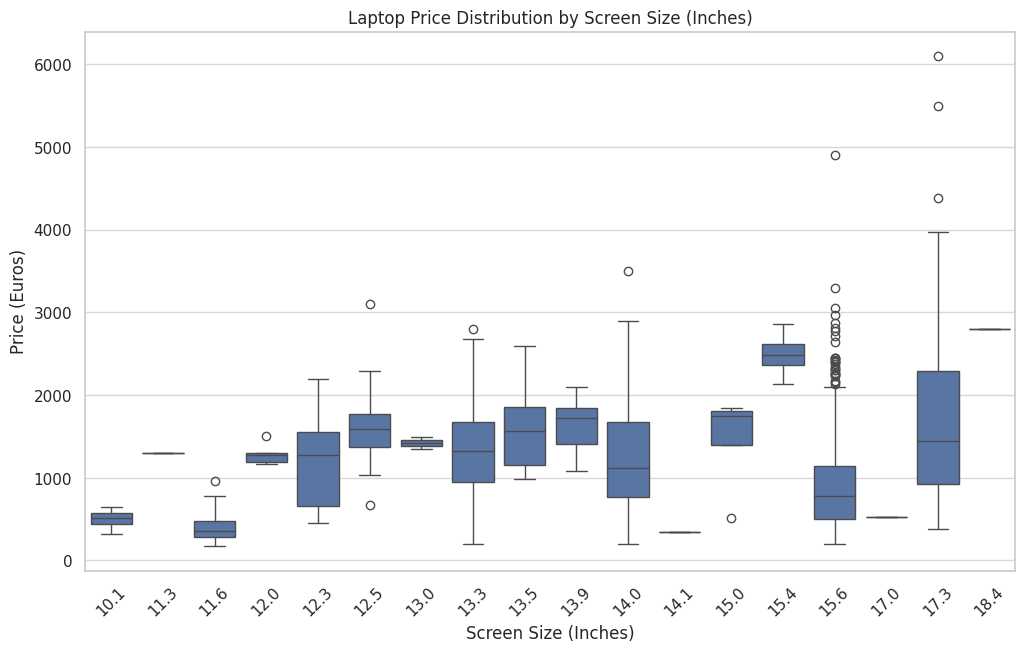

Observation: Generally, laptops with higher RAM tend to have higher median prices, as expected. There's also a wider price range for higher RAM configurations.


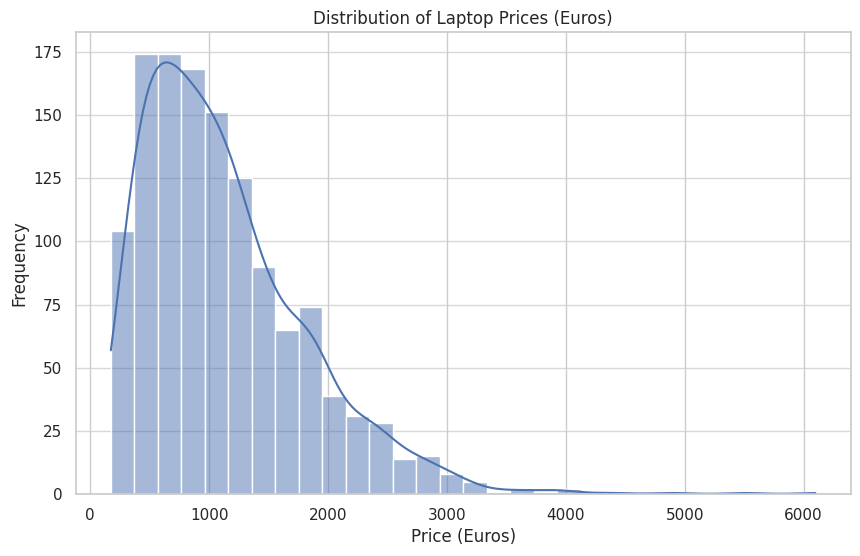

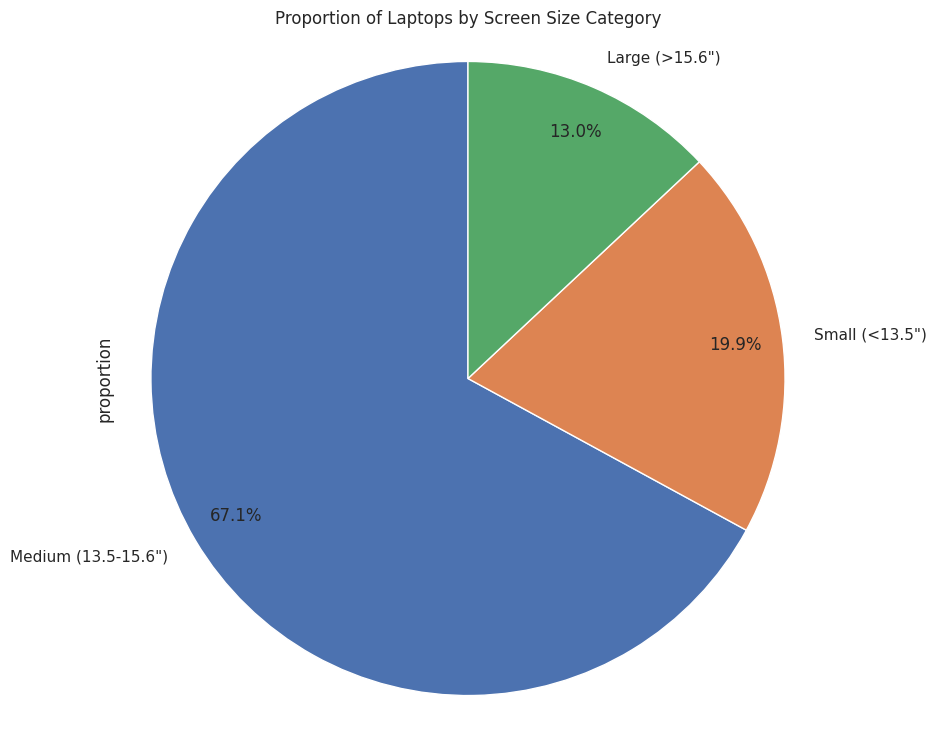

Observation: This pie chart shows the percentage of laptops available in different screen size categories.


/tmp/ipython-input-23-2668860724.py:159: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Laptop Type', bbox_to_anchor=(1.05, 1))


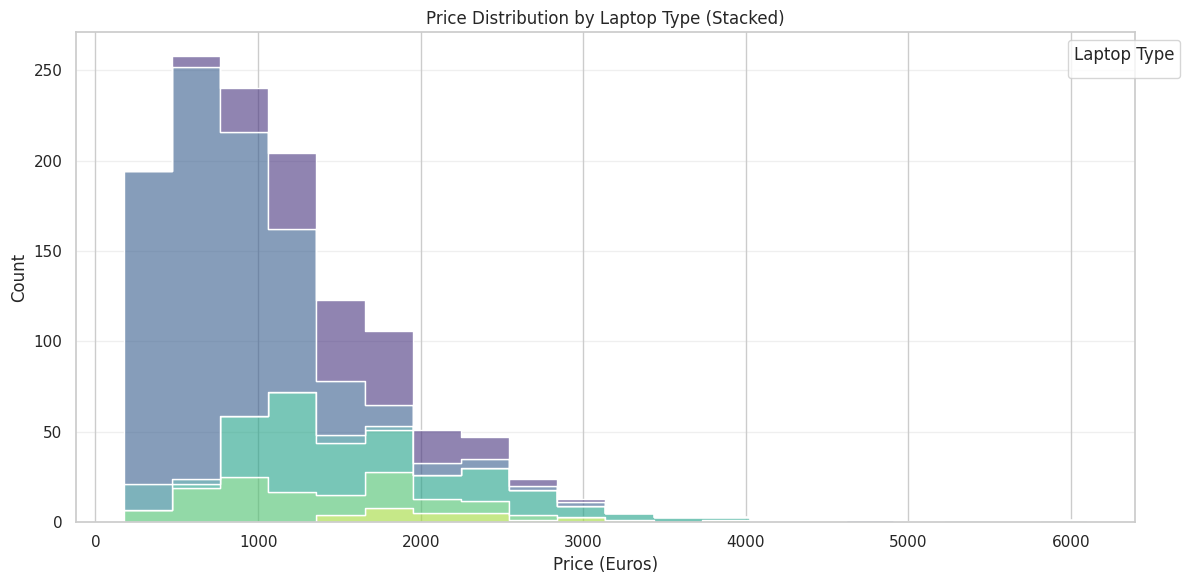

Insight: Reveals how different laptop types contribute to overall price distribution.


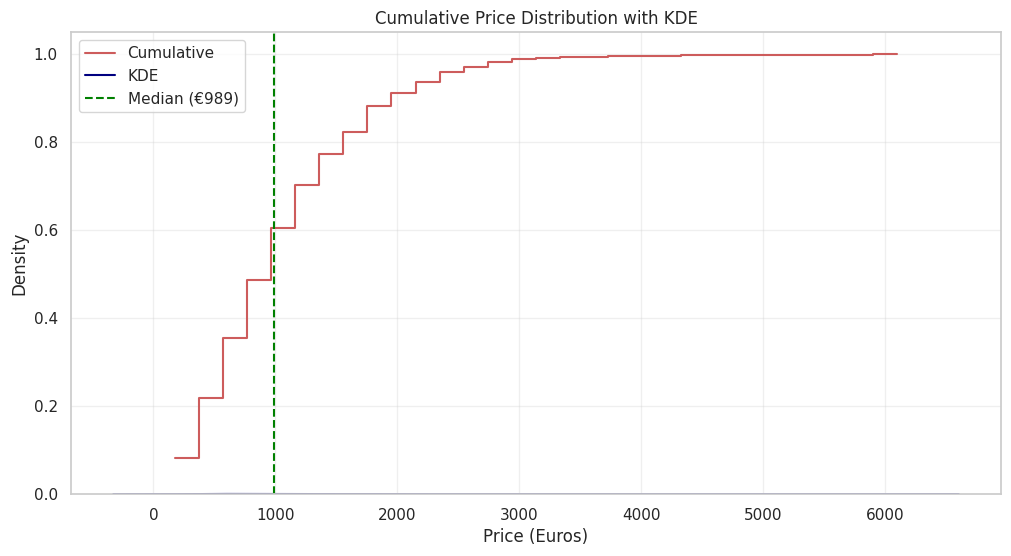

Insight: 989€ is the price point where 50% of laptops are cheaper.

--- Project Summary ---
Problem: Predicted the price of laptops based on their specifications.
Steps performed:
  - Loaded and preprocessed the dataset (handled categorical data with One-Hot Encoding).
  - Split data into training and testing sets.
  - Trained a Linear Regression model to predict laptop prices.
  - Evaluated the model using MSE and R-squared.
  - Visualized the actual vs predicted prices.

Key Points:
  - Data Preprocessing is crucial for converting categorical data to numerical data.
  - Train-test split is essential to evaluate the model on unseen data.
  - Linear Regression is a good starting point, but other models like Random Forest or XGBoost could improve performance.

EDA completed.


In [23]:
# Laptop Price Analysis

# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Libraries imported successfully!")

# --- Step 2: Load Dataset ---
try:
    data = pd.read_csv('laptop_prices.csv')
except FileNotFoundError:
    print("laptop_prices.csv not found. Please ensure the file is in the correct directory or provide the full path.")
    try:
        data = pd.read_csv('/kaggle/input/laptop-prices/laptop_prices.csv')
        print("Dataset loaded from Kaggle path.")
    except FileNotFoundError:
        print("Could not load dataset. Please download 'laptop_prices.csv' and place it in the same directory as your notebook.")
        exit() # Stop execution if data cannot be loaded

print("\n--- Dataset Information ---")
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset shape (rows, columns):", data.shape)
print("\nDataset information (column types and non-null counts):")
data.info()
print("\nMissing values per column:")
print(data.isnull().sum())
print("\nDescriptive statistics of numerical columns:")
print(data.describe())

# --- Step 3: Data Preprocessing ---

print("\n--- Data Preprocessing ---")
print("No missing values found, skipping handling missing values step.")

# Identify categorical columns to encode.
categorical_cols_to_encode = [
    col for col in data.select_dtypes(include='object').columns
    if col not in ['Product', 'Price_euros'] # Ensure target is not encoded
]

df_encoded = pd.get_dummies(data, columns=categorical_cols_to_encode, drop_first=True)

print(f"\nOriginal number of columns: {data.shape[1]}")
print(f"Number of columns after One-Hot Encoding: {df_encoded.shape[1]}")
print("First 5 rows of the encoded dataset:")
print(df_encoded.head())

# c. Feature Selection

if 'Product' in df_encoded.columns:
    X = df_encoded.drop(['Price_euros', 'Product'], axis=1)
else:
    X = df_encoded.drop('Price_euros', axis=1)

y = df_encoded['Price_euros']               # Target variable (dependent variable)

print(f"\nShape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

# --- Step 4: Train-Test Split ---

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# --- Step 5: Train the Model ---

model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression model trained successfully!")

# --- Step 6: Make Predictions ---

y_pred = model.predict(X_test)
print("\nPredictions made on the test set.")

# --- Step 7: Evaluate the Model ---

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# --- Step 8: Visualize Results ---

print("---------- Graphical Analysis -----------")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Plotting the ideal line
plt.xlabel("Actual Prices (Euros)")
plt.ylabel("Predicted Prices (Euros)")
plt.title("Actual vs Predicted Laptop Prices")
plt.grid(True)
plt.show()
print("Observation: The distribution of laptop prices is right-skewed, indicating more affordable laptops and fewer very expensive ones.")

# Price vs. Weight
sns.regplot(x='Weight', y='Price_euros', data=data)
plt.title('Price vs. Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (Euros)')
plt.show()

# Price vs. Screen Size (Box Plot)
plt.figure(figsize=(12, 7))
# Sort unique screen sizes for better visualization
sorted_inches = sorted(data['Inches'].unique())
sns.boxplot(x='Inches', y='Price_euros', data=data, order=sorted_inches)
plt.title('Laptop Price Distribution by Screen Size (Inches)')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price (Euros)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()
print("Observation: Generally, laptops with higher RAM tend to have higher median prices, as expected. There's also a wider price range for higher RAM configurations.")

# Distribution of Laptop Prices (Histogram with KDE)
plt.figure(figsize=(10, 6))
sns.histplot(data['Price_euros'], kde=True, bins=30)
plt.title('Distribution of Laptop Prices (Euros)')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Proportion of Laptops by Binned Screen Size
bins = [0, 13.5, 15.6, data['Inches'].max()]
labels = ['Small (<13.5")', 'Medium (13.5-15.6")', 'Large (>15.6")']
data['Screen_Size_Category'] = pd.cut(data['Inches'], bins=bins, labels=labels, right=True)
plt.figure(figsize=(9, 9))
screen_proportions = data['Screen_Size_Category'].value_counts(normalize=True) * 100
screen_proportions.plot(kind='pie', autopct='%.1f%%', startangle=90, pctdistance=0.85)
plt.title('Proportion of Laptops by Screen Size Category')
#plt.ylabel('')
plt.axis('equal')
plt.show()
print("Observation: This pie chart shows the percentage of laptops available in different screen size categories.")

# Stacked Histogram by Laptop Type
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Price_euros', hue='TypeName', element='step', fill=True, palette='viridis', alpha=0.6,bins=20, multiple='stack')
plt.title('Price Distribution by Laptop Type (Stacked)')
plt.xlabel('Price (Euros)')
plt.ylabel('Count')
plt.legend(title='Laptop Type', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print("Insight: Reveals how different laptop types contribute to overall price distribution.")

# Cumulative Distribution with KDE Overlay
plt.figure(figsize=(12, 6))
ax = sns.histplot(data['Price_euros'], bins=30,stat='density', cumulative=True, element='step', fill=False,color='indianred',label='Cumulative')

sns.kdeplot(data['Price_euros'], color='navy', label='KDE', ax=ax)
plt.axvline(data['Price_euros'].median(), color='green', linestyle='--', label=f'Median (€{data["Price_euros"].median():.0f})')
plt.title('Cumulative Price Distribution with KDE')
plt.xlabel('Price (Euros)')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
print(f"Insight: {data['Price_euros'].median():.0f}€ is the price point where 50% of laptops are cheaper.")

print("\n--- Project Summary ---")
print("Problem: Predicted the price of laptops based on their specifications.")
print("Steps performed:")
print("  - Loaded and preprocessed the dataset (handled categorical data with One-Hot Encoding).")
print("  - Split data into training and testing sets.")
print("  - Trained a Linear Regression model to predict laptop prices.")
print("  - Evaluated the model using MSE and R-squared.")
print("  - Visualized the actual vs predicted prices.")
print("\nKey Points:")
print("  - Data Preprocessing is crucial for converting categorical data to numerical data.")
print("  - Train-test split is essential to evaluate the model on unseen data.")
print("  - Linear Regression is a good starting point, but other models like Random Forest or XGBoost could improve performance.")

# --- Exploratory Data Analysis (EDA) ---
print("\nEDA completed.")
